<a href="https://colab.research.google.com/github/shantasharma/CNN_task/blob/main/CNN_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Part

Use this dataset (https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip) to train a CNN. Use no other data source or pretrained networks, and explain your design choices during preprocessing, model building and training. Also, cite the sources you used to borrow techniques. A test set will be provided later to judge the performance of your classifier. Please save your model checkpoints.

In [1]:
#importimg required libraries for data preprocessing
import cv2
import os
import random
from json import loads
import matplotlib.pyplot as plt
from itertools import repeat
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing <br>

This is the part of the code which deals with preprocessing the data. Following are cells in which data preprocessing have been performed.

In this cell config contains the address to the orignal_data_path consists the path to the orignal training images and prosessed_data_path consists path to the processed images. These paths can be changed accoringly.  For the purpose of testing, please assign the path to testing data to test_data_path



In [ ]:
#this is config file. It consists of input and output directories. To run the code, one must change the paths.


config = '{"original_data_path": "/content/drive/MyDrive/mitdas/trainPart1.zip (Unzipped Files)/train/", "processed_data_path":"/content/drive/MyDrive/mitdas/out_dir/", "test_data_path":" "}'

def path_gen(config):
      msg = loads(config)
      processed_data_path = msg["processed_data_path"]
      original_data_path = msg["original_data_path"]
      return original_data_path, processed_data_path

original_data_path, processed_data_path = path_gen(config)



This fuction generates paths to of all the training images avalaible

In [ ]:
image_path = []

for root, dir_name, files in os.walk(original_data_path):
    for d in sorted(dir_name):
      file = [os.path.join(original_data_path, d, name) for name in os.listdir(os.path.join(original_data_path, d)) if os.path.isfile(os.path.join(original_data_path ,d, name))]
      image_path.extend(file)



Generates a sample of 6 random images from training data for the purpose of visualisation. 

Observations:
*   In these images we can see that there is alot of white background around    the main character. My ideas is to crop out the white background horizontally, as it does not contain any information w.r.t to the character's geometric details. While the white background wrt to positive y axis has been preserved as it would provide information about the characters height which can be useful feature in distinguishing between the small and capital alphabets which are similar to each other in shape like (O, o), (S, s), (P, p) etc.

*  Along with this most of the images in the dataset provided are thick edged images. Inorder enable the model to train on thin edged images, I chose 6 images randomly from each character and skletonized it. After this inorder to reduced sharp edges the image's edges were smoothened.



Generating sample images


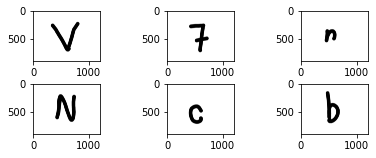

In [ ]:
print('Generating sample images')
rand = random.sample(image_path, 6)  

for i in range(0, 6):
    img = cv2.imread(rand[i], 0)
    img = img/255
    
    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=1, hspace=0)
    plt.imshow(img, cmap='gray')


Image preprocesing: <br>
All the image preporcessing is performed using cv2 library.

Following are the steps performed for image preporcessing.

1. Convert the images to gray scale
2. To find the threshold values and the thresholded images
3. Find the contours and find the contours with the largest area
4. Find the bounding boxes
5. Crop the images

Images:                                                                         

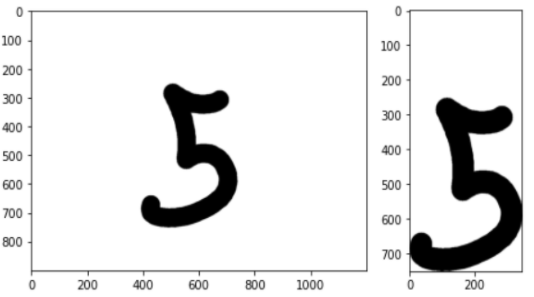



Skeletonization:

1. Six random images are selected from each folder.

2. The images are cropped using the above mentioned steps. The edges of the images are then reduced in thickness using erode function. Following is the image obtained:

3. The sharp edges of the images are then smoothened using the median blur function.Following is the image obtained.

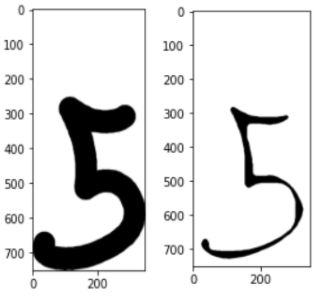





Directory Structure Creation:

1. Variable Description:

> gt_base: It is the list of labels.<br>
> save_path: It is the list of all folders in which the images are to be saved.<br>
> processed_paths: It is the list of paths of processed images.<br>


2. Structure: Consists of 62 folders, each folder consists of images that belong to it's label i.e. out_dir consists of folders each names after the label whose image it contains
    










In [ ]:
def cropped_images(image_data, processed_data_path):


  gt_base = []
  save_path = []
  processed_paths = []
  count = -1

  for j in range(0, 62):
    if(j < 10):
      gt_base.append(str(j))

    elif(j < 36):
      gt_base.append(chr(55 + j))

    else:
      gt_base.append((chr(61 + j)))


  for root, dir_name, files in os.walk(original_data_path, processed_data_path):

      for d in sorted(dir_name):
        count = count + 1
        if not os.path.isdir(os.path.join(processed_data_path, gt_base[count])):
          print(os.path.join(processed_data_path, gt_base[count]))
          os.mkdir(os.path.join(processed_data_path, gt_base[count]))
        filef = [os.path.join(original_data_path, d, name) for name in os.listdir(os.path.join(original_data_path, d))]
        save_path.append(os.path.join(processed_data_path, gt_base[count]))
        rand = random.sample(filef, 6)
        print(rand)

        for f in filef:

            im_gray1 = cv2.imread(f, 0)
            height, width = im_gray1.shape
            th, im_gray = cv2.threshold(im_gray1, 240, 255, cv2.THRESH_BINARY_INV)
            cnts = cv2.findContours(im_gray , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
            cnt = sorted(cnts, key=cv2.contourArea)[-1]
            x,y,w,h = cv2.boundingRect(cnt)
            dst = im_gray1[0: y + h + 10, x - 10: x + w + 10]
            file_name = f.split('/')[-1]
            file_save_path = os.path.join(save_path[count], file_name)
            cv2.imwrite(file_save_path, dst)
            processed_paths.append(file_save_path)
      
        
        for rf in rand:

            kernel = np.ones((5, 5),np.uint8)
            img = cv2.imread(rf, 0)
            th, img = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)

            cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
            cnt = sorted(cnts, key = cv2.contourArea)[-1]
            x,y,w,h = cv2.boundingRect(cnt)
            img = img[0 : y + h + 10, x - 10 : x + w + 10]


            img = cv2.erode(img, kernel, iterations = 9)
            img = cv2.pyrUp(img)

            for i in range(0, 15):
              img = cv2.medianBlur(img, 7)


            img = cv2.pyrDown(img)
            th, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)

            file_name = rf.split('/')[-1]
            file_name = file_name + '_1'
            file_save_path = os.path.join(save_path[count], file_name)
            cv2.imwrite(file_save_path, img)
            processed_paths.append(file_save_path)


  return processed_paths


#uncomment this command if you want to preprocess the images
#Inorder to generate test data, please update all the paths in this cell and the preceeding cells correctly
#save_paths = cropped_images(image_path, processed_data_path)

#### Image augmentation

In this width_shift, height_Shift, shear range and zoom range augmentation techniques have been used, as it helped in achieveing best performance. Horizontal flip, vertical flip were not used because these can cause confusion between (9, 6) and (P and 9[diferent nine])


In [2]:

dir = '/content/drive/MyDrive/mitdas/dir_out/'

train_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        validation_split=0.2,
        )

data = train_datagen.flow_from_directory(
      dir,
      batch_size=32,
      target_size=(50, 50),
      shuffle = True,
      subset='training'
      )

val_data = train_datagen.flow_from_directory(
      dir,
      batch_size=32,
      target_size=(50, 50),
      shuffle = True,
      subset='validation'
      )

Found 1984 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


Libraries for model training

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import keras
import matplotlib.pyplot as plt
import tensorflow as tf


Plotting model accuracy and loss

In [12]:
import matplotlib.pyplot as plt
def plot_model(model_archi):
  plt.plot(model_archi.history['acc'])
  plt.plot(model_archi.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  print(" ")
  plt.plot(model_archi.history['loss'])
  plt.plot(model_archi.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
from tensorflow import keras

model_2 = keras.models.Sequential([                                     
    keras.layers.Conv2D(64, kernel_size = 5, strides = 1,  activation='relu', input_shape=(50, 50, 3), padding='same'), #C1
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #S2
    keras.layers.Conv2D(128, kernel_size = 5, strides = 1, activation='relu', padding='same'), #C3
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #
    keras.layers.Conv2D(256, kernel_size = 5, strides = 1, activation='relu', padding='same'), #C3
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #S4
    keras.layers.Dropout(0.8),
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(62, activation='softmax') #Output layer
])


checkpoint_filepath = '/content/drive/MyDrive/mitdas/temp/points'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq= 20,
    monitor='acc',
    mode='max',
    save_best_only=True)

model_2.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])


lenet_model_2 = model_2.fit_generator(
              data,
              steps_per_epoch = 40,
              epochs= 100,
              validation_data = val_data,
              validation_steps = 10,
              callbacks = [model_checkpoint_callback])

## Train on MNIST dataset.

1. Loading MNIST dataset.<br>
source of data: http://yann.lecun.com/exdb/mnist/<br>
code reference: https://stackoverflow.com/questions/62958011/how-to-correctly-parse-mnist-datasetidx-format-into-python-arrays

Unzipping the files

In [ ]:
!gzip -d /content/drive/MyDrive/mitdas/train-images-idx3-ubyte.gz

In [ ]:
!gzip -d /content/drive/MyDrive/mitdas/train-labels-idx1-ubyte.gz

In [ ]:
!gzip -d /content/drive/MyDrive/mitdas/t10k-labels-idx1-ubyte.gz

gzip: /content/drive/MyDrive/mitdas/t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y


In [ ]:
!gzip -d /content/drive/MyDrive/mitdas/t10k-images-idx3-ubyte.gz

gzip: /content/drive/MyDrive/mitdas/t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y


Data extraction

In [3]:
import numpy as np
import struct

filename = {'images' : '/content/drive/MyDrive/mitdas/train-labels-idx1-ubyte' ,'labels' : '/content/drive/MyDrive/mitdas/train-labels-idx1-ubyte'}

with open('/content/drive/MyDrive/mitdas/train-images-idx3-ubyte', 'rb') as f:
    magic, size = struct.unpack('>II', f.read(8))
    nrows, ncols = struct.unpack('>II', f.read(8))
    
    data = np.fromfile(f, dtype=np.dtype(np.uint8)).newbyteorder(">")
    data = data.reshape((size, nrows, ncols))
    print(data.shape)

with open('/content/drive/MyDrive/mitdas/train-labels-idx1-ubyte', 'rb') as i:
    magic, size = struct.unpack('>II', i.read(8))
    data_1 = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">")   

x_train, y_train = data, data_1


with open('/content/drive/MyDrive/mitdas/t10k-images-idx3-ubyte', 'rb') as f:
    magic, size = struct.unpack('>II', f.read(8))
    nrows, ncols = struct.unpack('>II', f.read(8))
    
    tdata = np.fromfile(f, dtype=np.dtype(np.uint8)).newbyteorder(">")
    tdata = tdata.reshape((size, nrows, ncols))
    print(data.shape)

with open('/content/drive/MyDrive/mitdas/t10k-labels-idx1-ubyte', 'rb') as i:
    magic, size = struct.unpack('>II', i.read(8))
    tdata_1 = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">") 


x_test, y_test = tdata, tdata_1

(60000, 28, 28)
(60000, 28, 28)


Resizing the images to make it comaptible to the model. Converting (28, 28) image to (50, 50, 3)

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0


len = x_train.shape[0]
resize = np.zeros(((len, 50, 50, 3)))

for i in range(0, len):
  img = cv2.resize(x_train[i], dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
  img = np.expand_dims(img, axis=2)
  image = cv2.merge((img ,img, img))
  resize[i] = image


len1 = x_test.shape[0]
resize_t = np.zeros(((len1, 50, 50, 3)))

for i in range(0, len1):
  img = cv2.resize(x_test[i], dsize=((50, 50)), interpolation=cv2.INTER_CUBIC)
  img = np.expand_dims(img, axis=2)
  image = cv2.merge((img ,img, img))
  resize_t[i] = img

Creating one-hot-encoding for y_train and y_test

In [8]:
indices = y_train
C = tf.constant(10, name = "C")
      
train = tf.one_hot(
    indices, C, on_value = 1.0, off_value = 0.0, axis =-1)

indices = y_test
c = tf.constant(10, name = "c")
      
test = tf.one_hot(
    indices, c, on_value = 1.0, off_value = 0.0, axis =-1) 


Loading the pre-trained model and training it on MNIST dataset. Removing the last dense layer and adding the dense layer with 10 units

In [5]:
exp_path = '/content/drive/MyDrive/mitdas/temp/checkpoint_SA/'
class_62 = tf.keras.models.load_model(exp_path)

In [6]:
class_62.layers.pop()
class_62.add(tf.keras.layers.Dense(10, activation='softmax'))
for layer in class_62.layers:
    layer.trainable = True

In [9]:
class62_history = class_62.fit(resize, train, epochs = 20, validation_data = (resize_t, test), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 42s 5ms/step - loss: 2.0386 - acc: 0.5488 - val_loss: 1.8749 - val_acc: 0.6817
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7637 - acc: 0.6762 - val_loss: 1.6417 - val_acc: 0.6885
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5484 - acc: 0.6840 - val_loss: 1.4408 - val_acc: 0.6935
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3614 - acc: 0.6876 - val_loss: 1.2744 - val_acc: 0.6949
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2017 - acc: 0.6888 - val_loss: 1.1208 - val_acc: 0.6962
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0627 - acc: 0.6916 - val_loss: 0.9938 - val_acc: 0.6981
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9476 - acc: 0.6929 - val_loss: 0.8868 - val_acc: 0.6981
Epoch 8/20
1875/1875 [==============================] - 9s 5m

Training the model on same architecture, but the kernels are randomly initailized.

In [14]:

model_2 = keras.models.Sequential([                                     
    keras.layers.Conv2D(64, kernel_size = 5, strides = 1,  activation='relu', input_shape=(50, 50, 3), padding='same'), #C1
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #S2
    keras.layers.Conv2D(128, kernel_size = 5, strides = 1, activation='relu', padding='same'), #C3
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #
    keras.layers.Conv2D(256, kernel_size = 5, strides = 1, activation='relu', padding='same'), #C3
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), #S4
    keras.layers.Dropout(0.8),
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model_2.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

model2_history = model_2.fit(resize, train, epochs = 4, validation_data = (resize_t, test), verbose=1)


Epoch 1/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3013 - acc: 0.9007 - val_loss: 0.0368 - val_acc: 0.9890
Epoch 2/4
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0665 - acc: 0.9793 - val_loss: 0.0296 - val_acc: 0.9910
Epoch 3/4
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0509 - acc: 0.9842 - val_loss: 0.0195 - val_acc: 0.9934
Epoch 4/4
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0261 - val_acc: 0.9920


Model_Comparison

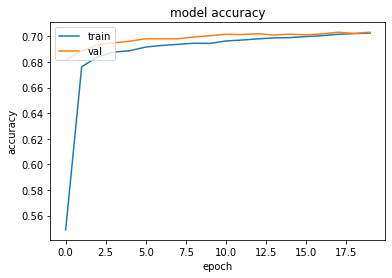

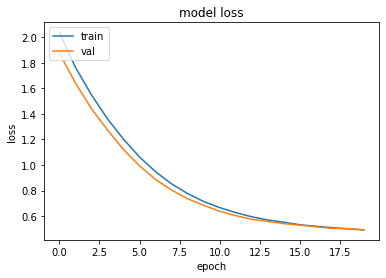

In [13]:
plot_model(class62_history)

In [ ]:
plot_model(model2_history)

The randomly initialized achitecture converges acter and shows better accuracy

### Part 3

 3. Finally, take the following dataset (https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip), train on this dataset and provide test accuracy on the MNIST test set, using the same test split from part 2. Train using scratch random initialization and using the pretrained network part 1. Do the same analysis as 2 and report what happens this time. Try and do qualitative analysis of what's different in this dataset. Please save your model checkpoints.



---
Now the images given in this folder are, though orgainised in folders labels 0, 1, 2 -----, 9 but every folder has images that belong all the numbers and there is no ground truth file available. Along with this, there was no pattern in which files were named. I could not think of a possible way of generating ground truth file for this dataset because of the mentioned reasons. Therefore, I did not train on the given dataset. 
